# Best Times to Tweets in Healthcare vs. Education

### Read in the csv file

In [1]:
import pandas as pd
df = pd.read_csv(r"E:\OneDrive - University of Georgia\Project\Data\tweet_data_3_groccery\4.3 FourColumns 3+1csv - Copy\grocerry_2019.csv",low_memory=False)
#df

### Convert the "Created At" field into a datetime data type, extract the day of the week, and map it onto a new column called "weekdays"

In [2]:
import datetime

df1 = df.copy()

df1['local_time'] = pd.to_datetime(df1['local_time'])
value = df1['local_time']
        
def weekday(date):
    if date.weekday() == 0:
        return 'Monday'
    elif date.weekday() == 1:
        return 'Tuesday'
    elif date.weekday() == 2:
        return 'Wednesday'
    elif date.weekday() == 3:
        return 'Thursday'
    elif date.weekday() == 4:
        return 'Friday'
    elif date.weekday() == 5:
        return 'Saturday'
    else:
        return 'Sunday'

df1["weekdays"] = value.map(weekday)
df1['weekdays']

0         Sunday
1         Sunday
2         Sunday
3         Sunday
4         Sunday
           ...  
218037    Sunday
218038    Sunday
218039    Sunday
218040    Sunday
218041    Sunday
Name: weekdays, Length: 218042, dtype: object

### Extract the time and map it onto a new column called "time"

In [4]:
df2 = df1.copy()

def time(date):
    time2 = date.time()
    return time2

df2["time"] = value.map(time)
df2['time']

0         22:54:00
1         23:09:55
2         21:44:47
3         23:26:57
4         23:21:26
            ...   
218037    00:32:00
218038    00:30:45
218039    00:54:32
218040    00:40:37
218041    00:07:17
Name: time, Length: 218042, dtype: object

### Group the times into hourly buckets and map it onto a new column called "time groups"

In [5]:
df3 = df2.copy()

def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '12AM-1AM'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '1AM-2AM'
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '2AM-3AM'
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '3AM-4AM'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '4AM-5AM'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '5AM-6AM'
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '6AM-7AM'
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '7AM-8AM'
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '8AM-9AM'
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '9AM-10AM'
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10AM-11AM'
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11AM-12PM'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12PM-1PM'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '1PM-2PM'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '2PM-3PM'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '3PM-4PM'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '4PM-5PM'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '5PM-6PM'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '6PM-7PM'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '7PM-8PM'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '8PM-9PM'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '9PM-10PM'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '10PM-11PM'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '11PM-12AM'
    else:
        return 'other'

df3["time groups"] = df3['time'].map(time_groups)
df3

,text,lon,lat,local_time,weekdays,time,time groups
0,@Kiana_Kawai Then this happened - it was a wei...,-159.532638,21.921875,2020-01-19 22:54:00,Sunday,22:54:00,10PM-11PM
1,Cars are scattering like Cockroaches at 3600 R...,-118.411907,34.020789,2020-01-19 23:09:55,Sunday,23:09:55,11PM-12AM
2,Your boyfriend is broke he shops at Costco - @...,-118.411907,34.020789,2020-01-19 21:44:47,Sunday,21:44:47,9PM-10PM
3,"I was in Walmart and a stocker, an older one, ...",-95.955956,36.742547,2020-01-19 23:26:57,Sunday,23:26:57,11PM-12AM
4,I want that 11pm Walmart &amp; Whataburger Rom...,-96.608012,33.675734,2020-01-19 23:21:26,Sunday,23:21:26,11PM-12AM
...,...,...,...,...,...,...,...
218037,Dave Style Pokémon Go. I caught this one durin...,-96.398422,30.159590,2019-01-20 00:32:00,Sunday,00:32:00,12AM-1AM
218038,I really hate the Walmart off Hemphill &amp; b...,-97.285914,32.779967,2019-01-20 00:30:45,Sunday,00:30:45,12AM-1AM
218039,‘Don't crowd the plow’ (snow storm interstate ...,-70.292545,43.696187,2019-01-20 00:54:32,Sunday,00:54:32,12AM-1AM
218040,@ksujulie @GingerHotDish You can already find ...,-84.408877,39.837603,2019-01-20 00:40:37,Sunday,00:40:37,12AM-1AM


### Get the value counts of "weekdays"

In [6]:
df3['weekdays'].value_counts()

Saturday     33394
Friday       31899
Sunday       31440
Wednesday    30657
Tuesday      30652
Thursday     30432
Monday       29568
Name: weekdays, dtype: int64

### Get the value counts of "time groups"

In [7]:
df3['time groups'].value_counts()

12PM-1PM     14828
1PM-2PM      14582
6PM-7PM      14511
5PM-6PM      14214
4PM-5PM      14174
7PM-8PM      14044
2PM-3PM      13829
3PM-4PM      13599
11AM-12PM    13535
8PM-9PM      13102
10AM-11AM    11654
9PM-10PM     11553
9AM-10AM      9974
10PM-11PM     9514
8AM-9AM       7662
11PM-12AM     6834
7AM-8AM       5317
12AM-1AM      4291
6AM-7AM       3087
1AM-2AM       2494
5AM-6AM       1530
2AM-3AM       1493
3AM-4AM       1089
4AM-5AM       1045
other           87
Name: time groups, dtype: int64

### Renamed "time groups" to "time_groups" for manipulation purposes later

In [8]:
df4 = df3.copy()
df5 = df4.rename(index=str, columns={"time groups": "time_groups"})
df5

,text,lon,lat,local_time,weekdays,time,time_groups
0,@Kiana_Kawai Then this happened - it was a wei...,-159.532638,21.921875,2020-01-19 22:54:00,Sunday,22:54:00,10PM-11PM
1,Cars are scattering like Cockroaches at 3600 R...,-118.411907,34.020789,2020-01-19 23:09:55,Sunday,23:09:55,11PM-12AM
2,Your boyfriend is broke he shops at Costco - @...,-118.411907,34.020789,2020-01-19 21:44:47,Sunday,21:44:47,9PM-10PM
3,"I was in Walmart and a stocker, an older one, ...",-95.955956,36.742547,2020-01-19 23:26:57,Sunday,23:26:57,11PM-12AM
4,I want that 11pm Walmart &amp; Whataburger Rom...,-96.608012,33.675734,2020-01-19 23:21:26,Sunday,23:21:26,11PM-12AM
...,...,...,...,...,...,...,...
218037,Dave Style Pokémon Go. I caught this one durin...,-96.398422,30.159590,2019-01-20 00:32:00,Sunday,00:32:00,12AM-1AM
218038,I really hate the Walmart off Hemphill &amp; b...,-97.285914,32.779967,2019-01-20 00:30:45,Sunday,00:30:45,12AM-1AM
218039,‘Don't crowd the plow’ (snow storm interstate ...,-70.292545,43.696187,2019-01-20 00:54:32,Sunday,00:54:32,12AM-1AM
218040,@ksujulie @GingerHotDish You can already find ...,-84.408877,39.837603,2019-01-20 00:40:37,Sunday,00:40:37,12AM-1AM


### Define the efficiency scores for the heat map

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                "Friday", "Saturday", "Sunday"]
time_frames = ["12AM-1AM", "1AM-2AM", "2AM-3AM", "3AM-4AM", "4AM-5AM", 
               "5AM-6AM", "6AM-7AM", "7AM-8AM", "8AM-9AM", "9AM-10AM",
               "10AM-11AM", "11AM-12PM", "12PM-1PM", "1PM-2PM", "2PM-3PM",
               "3PM-4PM", "4PM-5PM", "5PM-6PM", "6PM-7PM", "7PM-8PM",
               "8PM-9PM", "9PM-10PM", "10PM-11PM", "11PM-12AM"]


def hc_efficiency_score(df, day, times):
    array1 = []
    array2=[]
    instance_val = 0
    #for each of the time frames
    for time in times:
        #locate the day of the week and the specific time frame, pull the data
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays", "time_groups"]]
        #If there are no tweets in that time frame
        if m1["time_groups"].count() == 0:
            #instance_val = 0
            #lowest category
            sum1 = 0
        else:
            #Sum the retweets, replies, and favorites and divide by num of tweets
            instance_val =  m1["time_groups"].count()
            array2.append(instance_val)
            #589.625 1392.5 2596.375 3876.5 4856.625 5232.25 5449.25 6275
            #putting the tweets into categorical buckets
            if  instance_val >=  quartile_15 and instance_val <quartile_16+1:
                sum1 = 16
            elif instance_val >= quartile_14 and instance_val < quartile_15:
                sum1 = 15
            elif  instance_val >=  quartile_13 and instance_val <quartile_14:
                sum1 = 14
            elif instance_val >= quartile_12 and instance_val < quartile_13:
                sum1 = 13
            elif instance_val >= quartile_11 and instance_val < quartile_12:
                sum1 = 12
            elif instance_val >= quartile_10 and instance_val < quartile_11:
                sum1 = 11
            elif instance_val >= quartile_9 and instance_val < quartile_10:
                sum1 = 10
            elif instance_val >=  quartile_8 and instance_val <quartile_9:
                sum1 = 9
            elif instance_val >= quartile_7 and instance_val <quartile_8:
                sum1 = 8
            elif instance_val >= quartile_6 and instance_val < quartile_7:
                sum1 = 7
            elif instance_val >= quartile_5 and instance_val < quartile_6:
                sum1 = 6
            elif instance_val >= quartile_4 and instance_val < quartile_5:
                sum1 = 5
            elif instance_val >= quartile_3 and instance_val < quartile_4:
                sum1 = 4
            elif instance_val >=  quartile_2 and instance_val <quartile_3:
                sum1 = 3
            elif instance_val >= quartile_1 and instance_val <quartile_2:
                sum1 = 2
            else:
                sum1 = 1
        
        array1.append(sum1)
        
    print(array2)
    return array1

### Heat map for Tweets

[543, 325, 200, 134, 141, 202, 453, 712, 951, 1271, 1488, 1800, 1974, 1862, 1797, 1741, 1879, 1978, 2125, 2030, 1928, 1655, 1404, 965]
[591, 360, 191, 132, 135, 235, 479, 727, 1066, 1409, 1481, 1698, 2057, 2013, 1915, 1752, 2010, 2043, 2110, 2142, 1953, 1719, 1408, 1011]
[620, 332, 209, 145, 135, 228, 463, 832, 1166, 1456, 1621, 1780, 2000, 1941, 1760, 1785, 1882, 1997, 2075, 2040, 1970, 1769, 1414, 1023]
[578, 319, 201, 151, 153, 231, 517, 813, 1141, 1430, 1591, 1749, 1908, 1916, 1808, 1862, 1846, 2012, 2184, 2085, 1889, 1705, 1385, 943]
[673, 349, 239, 155, 184, 290, 569, 933, 1251, 1460, 1734, 2058, 2125, 2109, 1963, 1887, 2112, 2045, 2113, 1983, 1824, 1545, 1291, 994]
[620, 382, 211, 168, 137, 153, 324, 733, 1128, 1563, 2060, 2362, 2515, 2478, 2394, 2340, 2292, 2074, 1996, 1834, 1677, 1535, 1350, 1056]
[666, 427, 242, 204, 160, 191, 282, 567, 959, 1385, 1679, 2088, 2249, 2263, 2192, 2232, 2153, 2065, 1908, 1930, 1861, 1625, 1262, 842]
[[4, 3, 2, 1, 1, 2, 4, 5, 6, 7, 9, 11, 13, 11, 

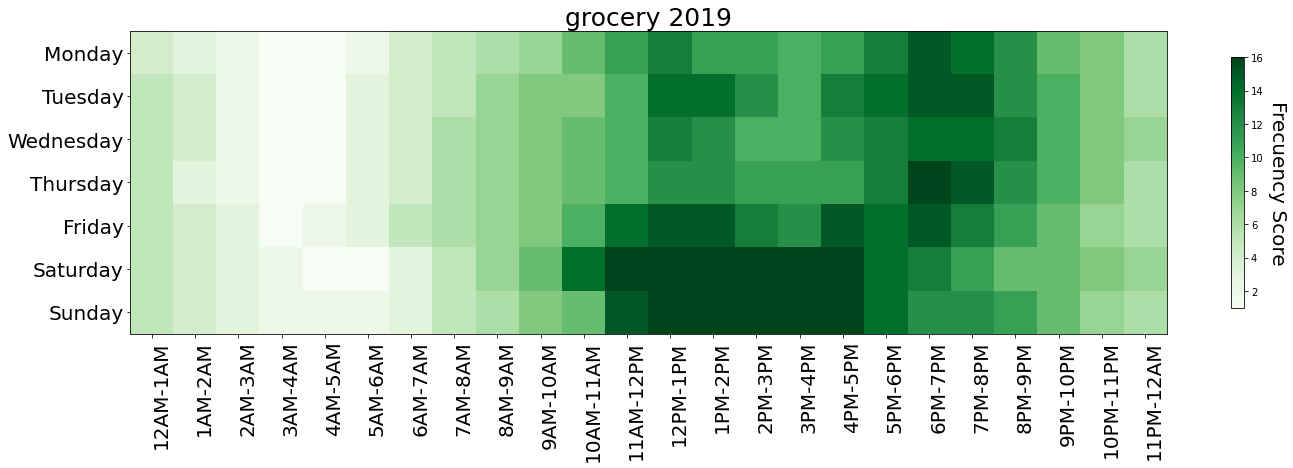

In [16]:
tweet_score = []

m_array = hc_efficiency_score(df5, "Monday", time_frames)
tweet_score.append(m_array)
t_array = hc_efficiency_score(df5, "Tuesday", time_frames)
tweet_score.append(t_array)
w_array = hc_efficiency_score(df5, "Wednesday", time_frames)
tweet_score.append(w_array)
th_array = hc_efficiency_score(df5, "Thursday", time_frames)
tweet_score.append(th_array)
f_array = hc_efficiency_score(df5, "Friday", time_frames)
tweet_score.append(f_array)
st_array = hc_efficiency_score(df5, "Saturday", time_frames)
tweet_score.append(st_array)
s_array = hc_efficiency_score(df5, "Sunday", time_frames)
tweet_score.append(s_array)
print(tweet_score)

fig, ax = plt.subplots(figsize=(20,50))
#(figsize=(width,height))
im = ax.imshow(tweet_score, cmap = cm.Greens)

#get rid of grid lines
ax.grid(False)

#show all ticks...
ax.set_xticks(np.arange(len(time_frames)))
ax.set_yticks(np.arange(len(days_of_week)))
# ... and label them with the respective list entries
ax.set_xticklabels(time_frames, fontsize=20)
ax.set_yticklabels(days_of_week, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

cbarlabel = "Frecuency Score"

cbar = ax.figure.colorbar(im, ax=ax,shrink=0.07)

cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize = 20)

ax.set_title("grocery 2019", fontsize = 25)
fig.tight_layout()
#plt.show()
from PIL import Image
#plt.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

In [10]:
#quantile 
data=[543, 325, 200, 134, 141, 202, 453, 712, 951, 1271, 1488, 1800, 1974, 1862, 1797, 1741, 1879, 1978, 2125, 2030, 1928, 1655, 1404, 965,591, 360, 191, 132, 135, 235, 479, 727, 1066, 1409, 1481, 1698, 2057, 2013, 1915, 1752, 2010, 2043, 2110, 2142, 1953, 1719, 1408, 1011,620, 332, 209, 145, 135, 228, 463, 832, 1166, 1456, 1621, 1780, 2000, 1941, 1760, 1785, 1882, 1997, 2075, 2040, 1970, 1769, 1414, 1023,578, 319, 201, 151, 153, 231, 517, 813, 1141, 1430, 1591, 1749, 1908, 1916, 1808, 1862, 1846, 2012, 2184, 2085, 1889, 1705, 1385, 943,673, 349, 239, 155, 184, 290, 569, 933, 1251, 1460, 1734, 2058, 2125, 2109, 1963, 1887, 2112, 2045, 2113, 1983, 1824, 1545, 1291, 994,620, 382, 211, 168, 137, 153, 324, 733, 1128, 1563, 2060, 2362, 2515, 2478, 2394, 2340, 2292, 2074, 1996, 1834, 1677, 1535, 1350, 1056,666, 427, 242, 204, 160, 191, 282, 567, 959, 1385, 1679, 2088, 2249, 2263, 2192, 2232, 2153, 2065, 1908, 1930, 1861, 1625, 1262, 842]

quartile_1 = np.quantile(data, 0.0625)
quartile_2 = np.quantile(data, 0.125)
quartile_3 = np.quantile(data, 0.1875)
quartile_4 = np.quantile(data, 0.25)
quartile_5 = np.quantile(data, 0.3125)
quartile_6 = np.quantile(data, 0.375)
quartile_7 = np.quantile(data, 0.4325)
quartile_8 = np.quantile(data, 0.5)
quartile_9 = np.quantile(data, 0.5625)
quartile_10 = np.quantile(data, 0.625)
quartile_11 = np.quantile(data, 0.6875)
quartile_12 = np.quantile(data, 0.75)
quartile_13 = np.quantile(data, 0.8125)
quartile_14 = np.quantile(data, 0.875)
quartile_15 = np.quantile(data, 0.9325)
quartile_16 = np.quantile(data, 1)

 
print(quartile_1,
      quartile_2,
      quartile_3,
      quartile_4,
      quartile_5,
      quartile_6,
      quartile_7,
      quartile_8,
      quartile_9,
      quartile_10,
      quartile_11,
      quartile_12,
      quartile_13,
      quartile_14,
      quartile_15,
      quartile_16)

157.1875 210.75 327.1875 561.0 748.0 1018.5 1304.4225000000004 1484.5 1696.8125 1789.5 1881.4375 1955.5 2012.6875 2076.25 2150.0025 2515


In [17]:
fig.savefig("time_grid_grocerry_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

### How many tweets in each timeframe

In [ ]:
tweet_count = []

def tweets(df, day, times):
    array1 = []
    for time in times:
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays","time_groups"]]
        instance_val = m1["time_groups"].count()
        array1.append(instance_val)
    return array1

m_count = tweets(df5, "Monday", time_frames)
print("Monday: ", m_count)
tweet_count.append(m_count)
t_count = tweets(df5, "Tuesday", time_frames)
tweet_count.append(t_count)
print("Tuesday: ", t_count)
w_count = tweets(df5, "Wednesday", time_frames)
tweet_count.append(w_count)
print("Wednesday: ", w_count)
th_count = tweets(df5, "Thursday", time_frames)
tweet_count.append(th_count)
print("Thursday: ", th_count)
f_count = tweets(df5, "Friday", time_frames)
tweet_count.append(f_count)
print("Friday: ", f_count)
st_count = tweets(df5, "Saturday", time_frames)
tweet_count.append(st_count)
print("Saturday: ", st_count)
s_count = tweets(df5, "Sunday", time_frames)
tweet_count.append(s_count)
print("Sunday: ", s_count)